<a href="https://colab.research.google.com/github/gsathvika2005/SKT_DS_04/blob/main/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
df = pd.read_csv("/content/drive/MyDrive/traffic_accidents.csv")
df.shape, df.columns


((209306, 24),
 Index(['crash_date', 'traffic_control_device', 'weather_condition',
        'lighting_condition', 'first_crash_type', 'trafficway_type',
        'alignment', 'roadway_surface_cond', 'road_defect', 'crash_type',
        'intersection_related_i', 'damage', 'prim_contributory_cause',
        'num_units', 'most_severe_injury', 'injuries_total', 'injuries_fatal',
        'injuries_incapacitating', 'injuries_non_incapacitating',
        'injuries_reported_not_evident', 'injuries_no_indication', 'crash_hour',
        'crash_day_of_week', 'crash_month'],
       dtype='object'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209306 entries, 0 to 209305
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   crash_date                     209306 non-null  object 
 1   traffic_control_device         209306 non-null  object 
 2   weather_condition              209306 non-null  object 
 3   lighting_condition             209306 non-null  object 
 4   first_crash_type               209306 non-null  object 
 5   trafficway_type                209306 non-null  object 
 6   alignment                      209306 non-null  object 
 7   roadway_surface_cond           209306 non-null  object 
 8   road_defect                    209306 non-null  object 
 9   crash_type                     209306 non-null  object 
 10  intersection_related_i         209306 non-null  object 
 11  damage                         209306 non-null  object 
 12  prim_contributory_cause       

/tmp/ipython-input-13-220686738.py:13: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')


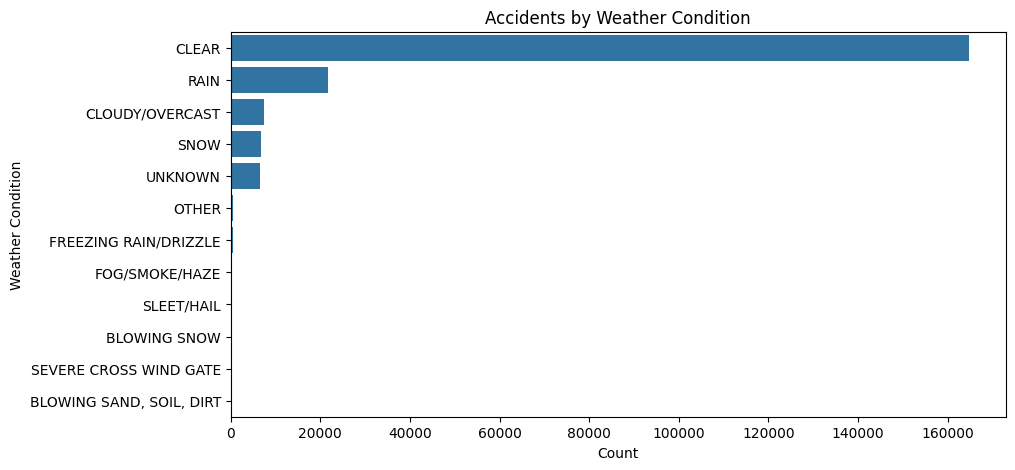

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap
df = pd.read_csv("/content/drive/MyDrive/traffic_accidents.csv")
df.shape, df.columns
df.info()
df.isnull().mean().sort_values(ascending=False).head(10)
df = df.drop(['Number', 'Weather_Timestamp', 'Wind_Chill(F)','precipitation(in)'], axis=1, errors='ignore')
df.dropna(subset=['crash_date', 'weather_condition', 'damage', 'crash_type'], inplace=True)
df['crash_date'] = pd.to_datetime(df['crash_date'], errors='coerce')
df.dropna(subset=['crash_date'], inplace=True)
df['crash_year'] = df['crash_date'].dt.year
df['crash_month'] = df['crash_date'].dt.month
df['crash_day_of_week'] = df['crash_date'].dt.day_name()
plt.figure(figsize=(10,5))
sns.countplot(y='weather_condition', data=df, order=df['weather_condition'].value_counts().index)
plt.title("Accidents by Weather Condition")
plt.xlabel("Count")
plt.ylabel("Weather Condition")
plt.show()



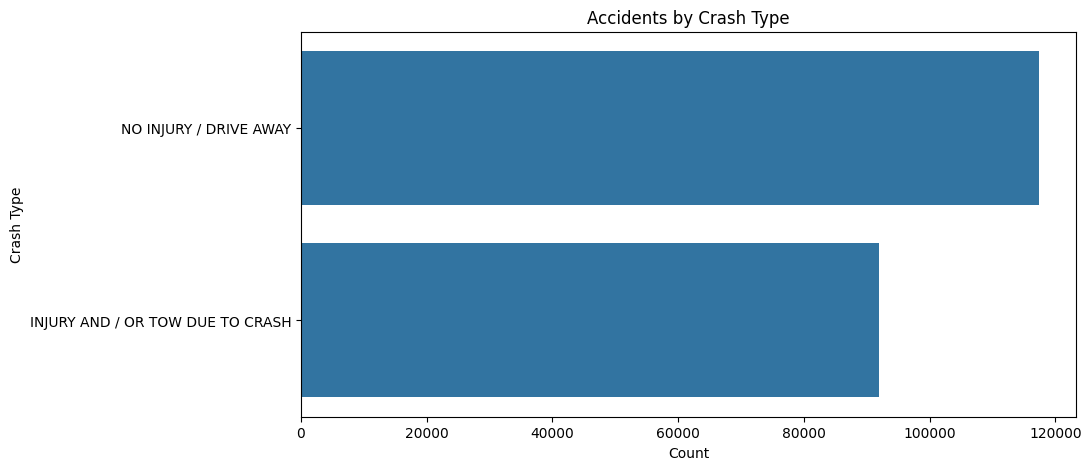

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y='crash_type', data=df, order=df['crash_type'].value_counts().index)
plt.title("Accidents by Crash Type")
plt.xlabel("Count")
plt.ylabel("Crash Type")
plt.show()

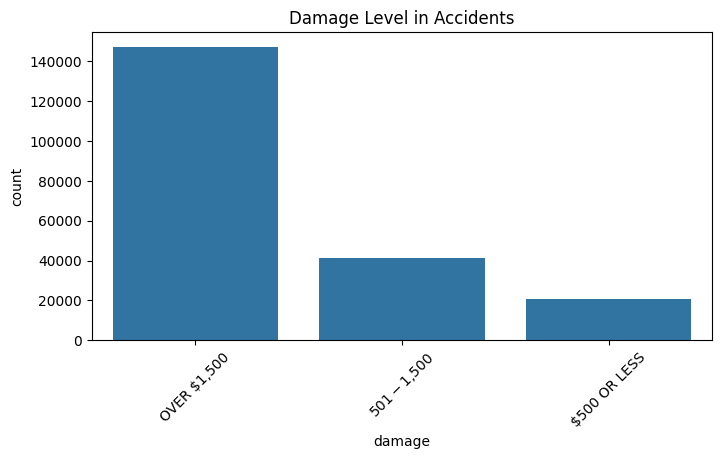

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='damage', order=df['damage'].value_counts().index)
plt.title("Damage Level in Accidents")
plt.xticks(rotation=45)
plt.show()

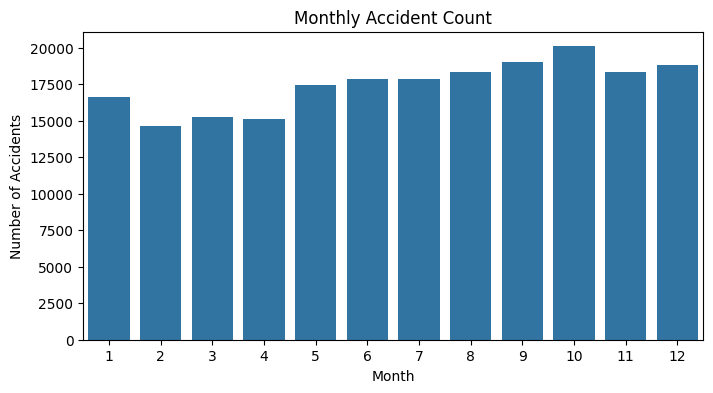

In [ ]:
plt.figure(figsize=(8,4))
sns.countplot(x='crash_month', data=df)
plt.title("Monthly Accident Count")
plt.xlabel("Month")
plt.ylabel("Number of Accidents")
plt.show()

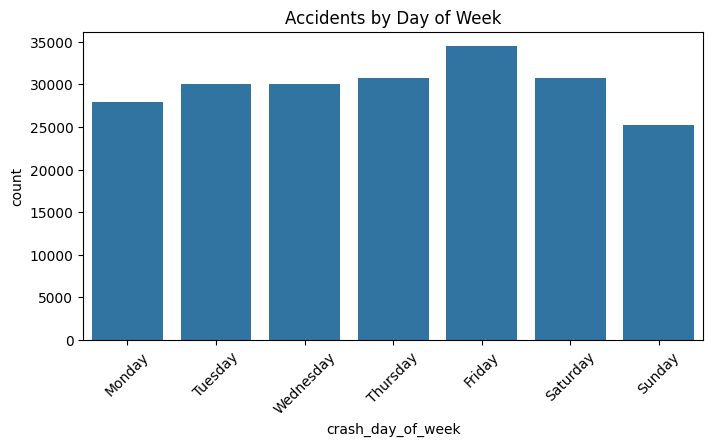

In [ ]:
plt.figure(figsize=(8,4))
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(x='crash_day_of_week', data=df, order=order)
plt.title("Accidents by Day of Week")
plt.xticks(rotation=45)
plt.show()